In [41]:
import pandas as pd
import numpy as np

from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

# import warnings
# warnings.filterwarnings("ignore")

In [42]:
df=pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/Logistic Regression/loans.csv')

x = df[['creditscore', 'amount','age','marital','health_ins']]

y=df[['accepted']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
# Scaler Transformation of data to deal with outliers
scaled_x = StandardScaler()
x_train = scaled_x.fit_transform(x_train)
x_test = scaled_x.transform(x_test)

In [44]:
logistic_model = joblib.load('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/Model Evaluation Metrics/logistic_model.pkl')

In [45]:
# Accuracy

y_prediction = logistic_model.predict(x_test)

accuracy_score(y_test, y_prediction)

0.958

In [46]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test, y_prediction)

array([[230,  12],
       [  9, 249]], dtype=int64)

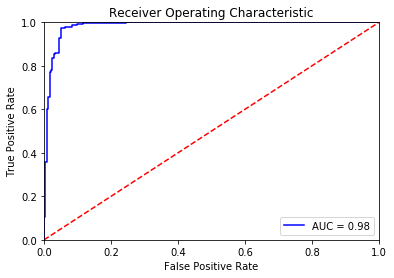

In [50]:
# ROC AUC Curve

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_prediction)

y_probability = logistic_model.predict_proba(x_test)
y_probability = y_probability[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_probability)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
# Regression Matrics

linear_regression_model = joblib.load('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/Model Evaluation Metrics/linear_regression_model.pkl')

In [52]:
dataset = pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/Multiple Regression/50_Startups.csv')

In [53]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [54]:
# Create a list of training columns or variables
train_cols = [col for col in dataset.columns if col != 'Profit']

In [55]:
# Create the data of independent variables
X = dataset[train_cols].values

# Create the dependent variable data
y = dataset['Profit'].values

In [56]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
# Scaler Transformation of data to deal with outliers
scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train)
X_test = scaled_X.transform(X_test)

In [58]:
y_prediction = linear_regression_model.predict(X_test)

In [59]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_prediction)

7514.293659640595

In [62]:
# RMSE

from sklearn.metrics import mean_squared_error
from numpy import math

math.sqrt(mean_squared_error(y_test,y_prediction))

9137.990152794911

In [64]:
# R2

from sklearn.metrics import r2_score

r2_score(y_test,y_prediction)

0.9347068473282429